<a href="https://colab.research.google.com/github/VihaShahh/Book-Recommendation-System-/blob/main/book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/book.csv',error_bad_lines = False)
df.head()

<ipython-input-1-962ee1ef491f>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/book.csv',error_bad_lines = False)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [ ]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [ ]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


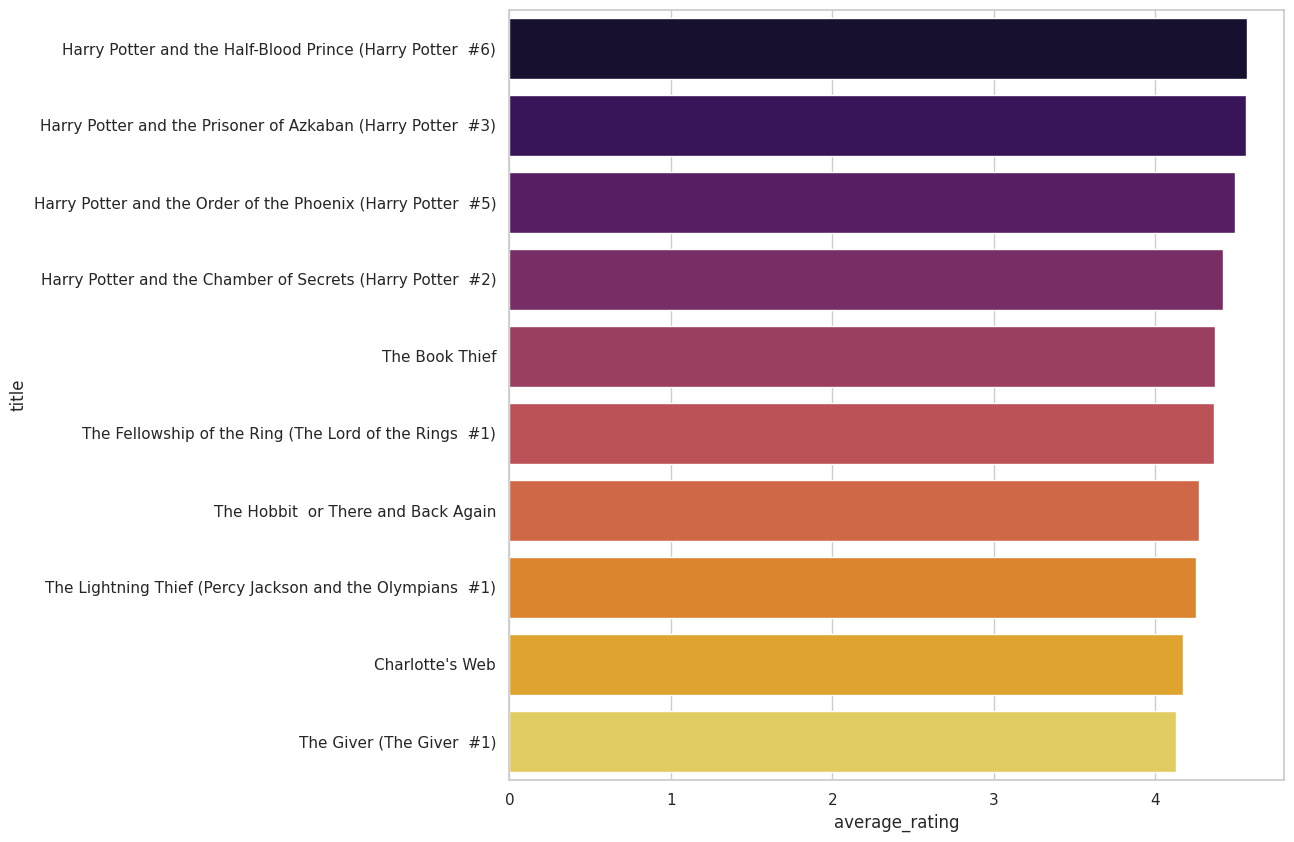

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame called 'df'

# Filter the DataFrame to get the top books with ratings_count > 1000000
top_ten = df[df['ratings_count'] > 1000000]

# Sort the filtered DataFrame by average_rating in descending order
top_ten = top_ten.sort_values(by='average_rating', ascending=False)

# Convert 'average_rating' column to a numeric type (if it's not already)
top_ten['average_rating'] = top_ten['average_rating'].astype(float)

# Set the style for the plot
sns.set(style='whitegrid')

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Select the top 10 books with the highest average ratings
data = top_ten.head(10)

# Create a bar plot using Seaborn
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

# Show the plot
plt.show()


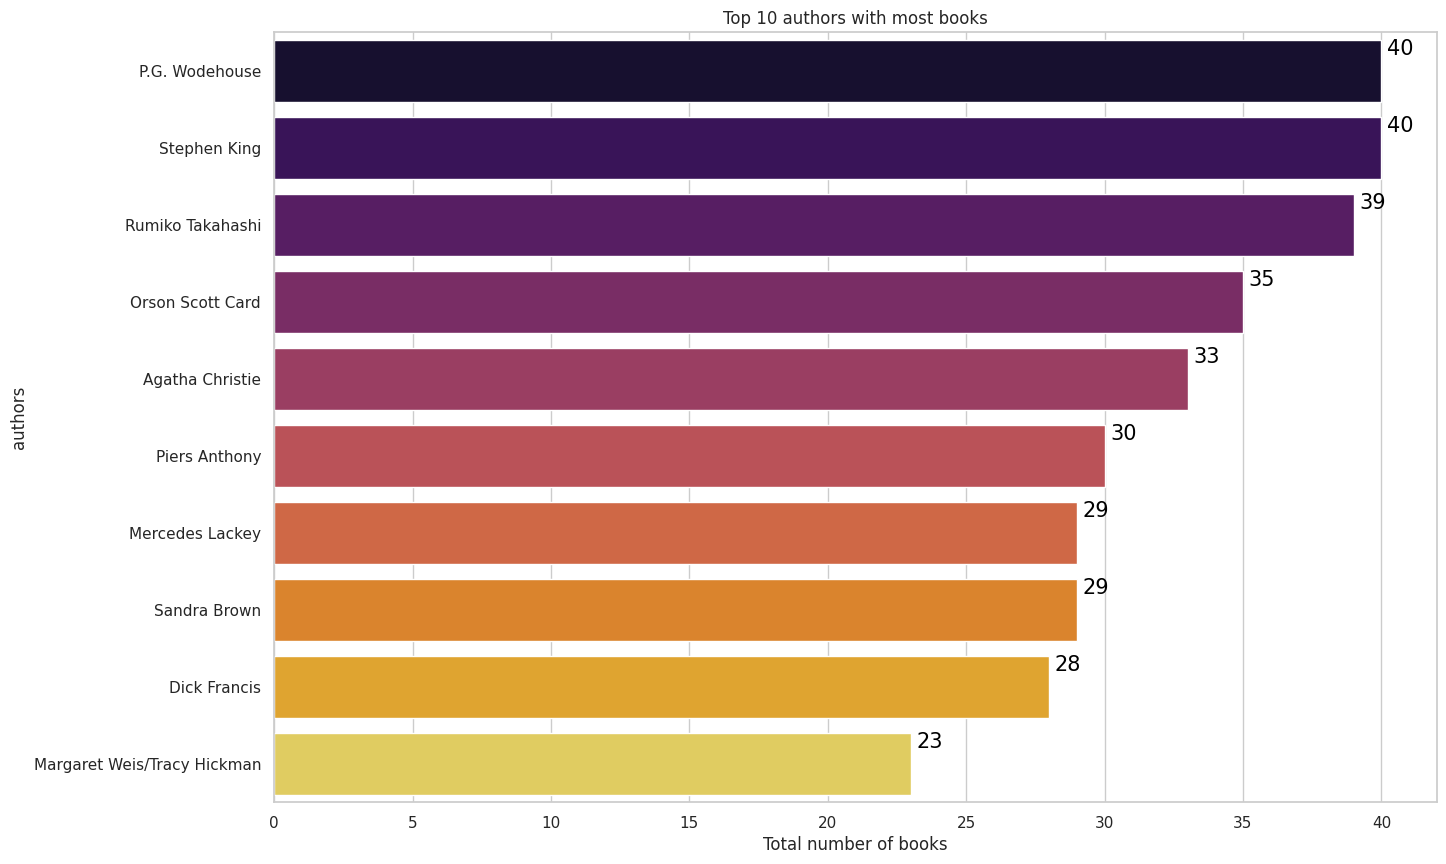

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame called 'df'

# Group by authors, count the number of titles, and sort in descending order
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10)

plt.figure(figsize=(15,10))
ax = sns.barplot(x="title", y="authors", data=most_books, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

# Annotate the bars with the total number of books
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')

plt.show()


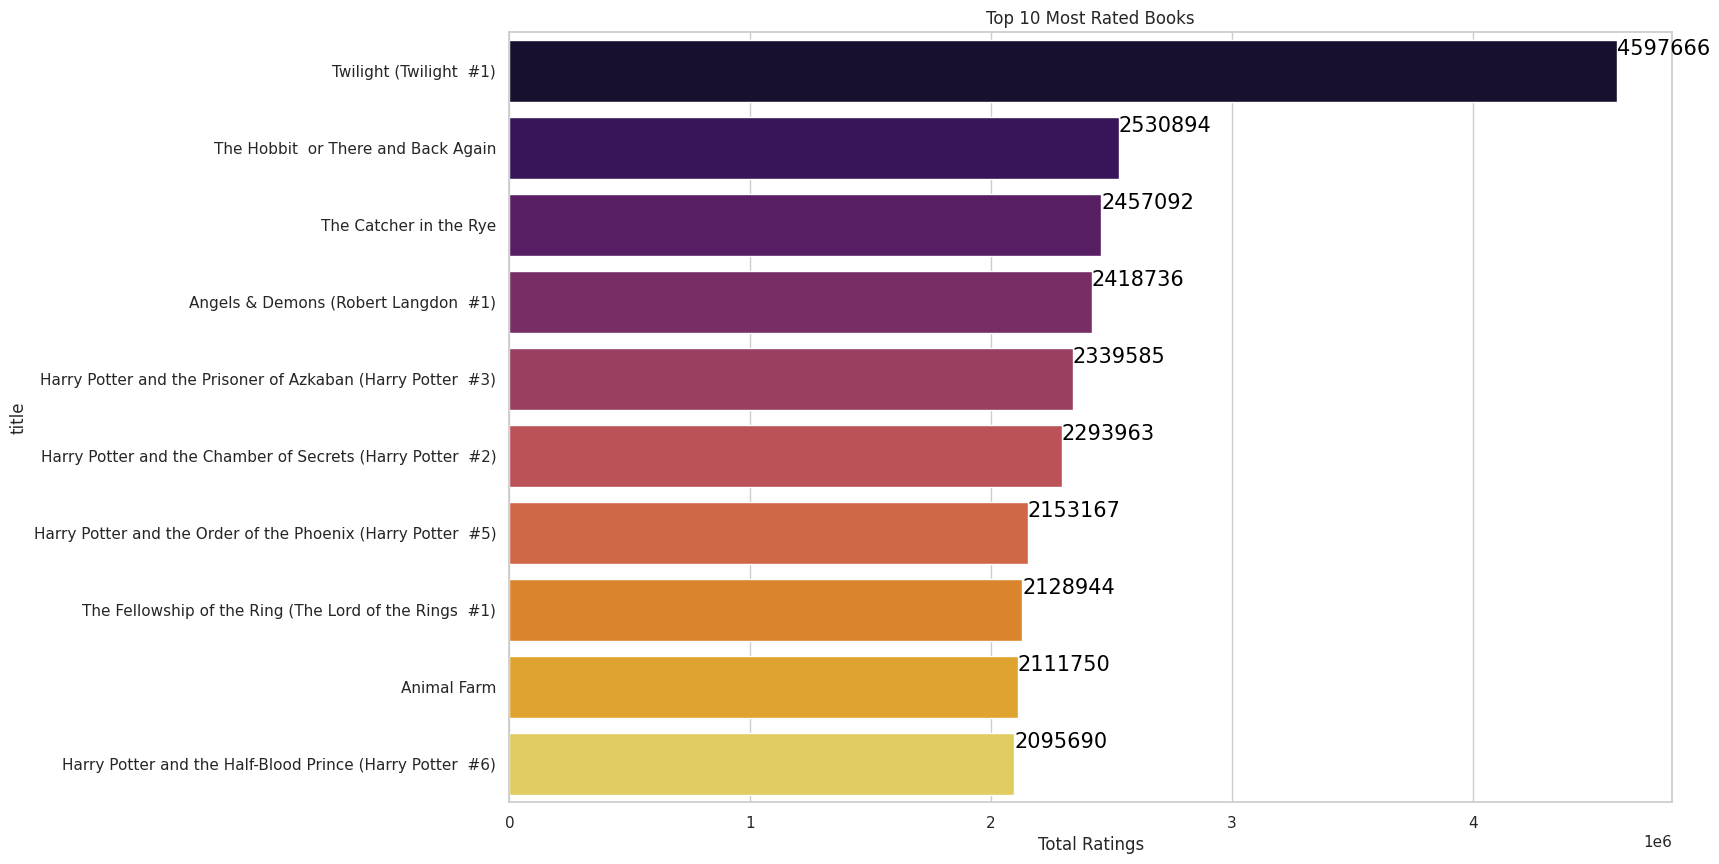

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame called 'df'

# Sort the DataFrame by 'ratings_count' in descending order and select the top 10
most_rated = df.sort_values('ratings_count', ascending=False).head(10)

plt.figure(figsize=(15, 10))
ax = sns.barplot(x="ratings_count", y="title", data=most_rated, palette='inferno')
ax.set_title("Top 10 Most Rated Books")
ax.set_xlabel("Total Ratings")

# Annotate the bars with the total ratings
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')

plt.show()


<ipython-input-12-c39e88e2265c>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'].dropna(), ax=ax)


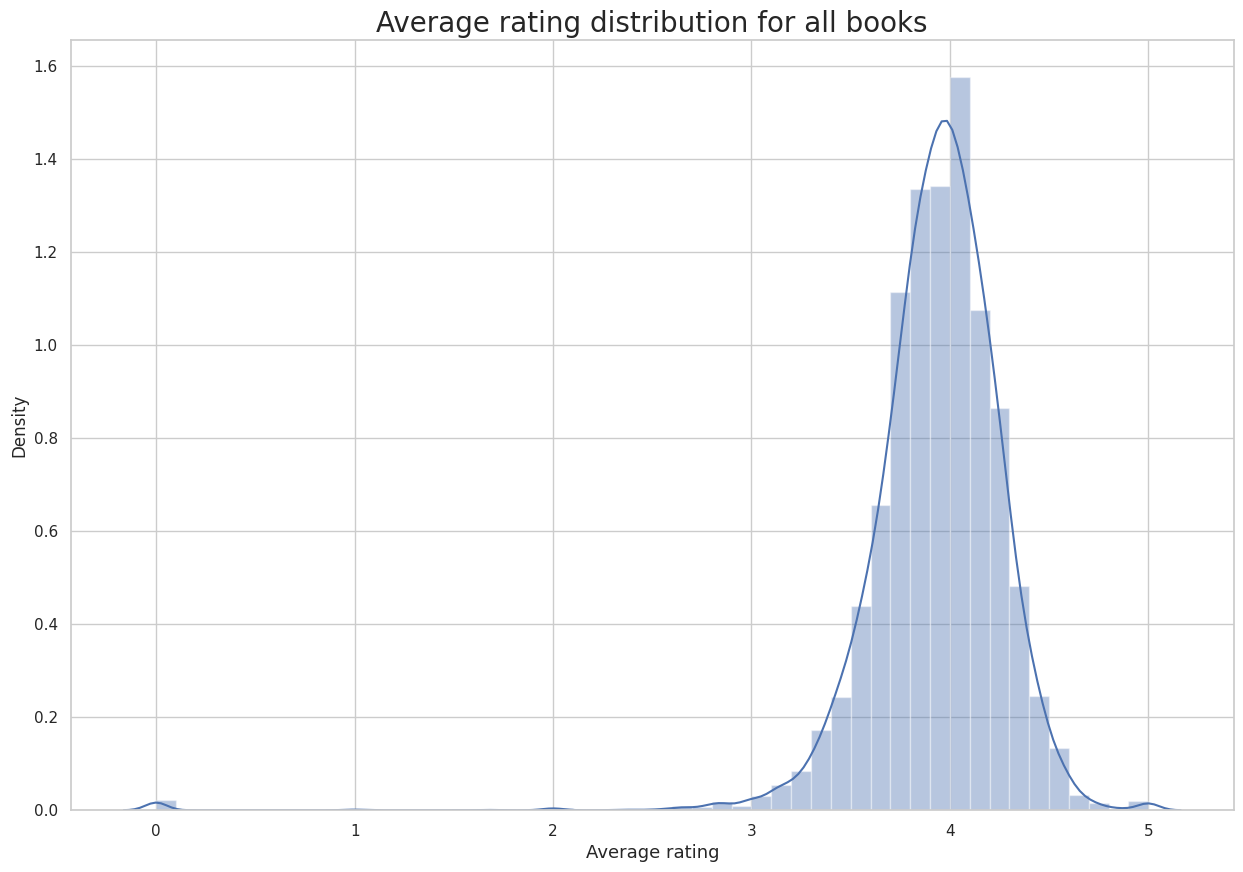

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame called 'df'

# Clean the 'average_rating' column by removing non-numeric characters
df['average_rating'] = df['average_rating'].str.replace('[^0-9.]', '', regex=True)

# Convert the 'average_rating' column to float, handling any conversion errors
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

# Create a histogram (distribution plot) of the cleaned 'average_rating' column
fig, ax = plt.subplots(figsize=[15, 10])
sns.distplot(df['average_rating'].dropna(), ax=ax)
ax.set_title('Average rating distribution for all books', fontsize=20)
ax.set_xlabel('Average rating', fontsize=13)

plt.show()


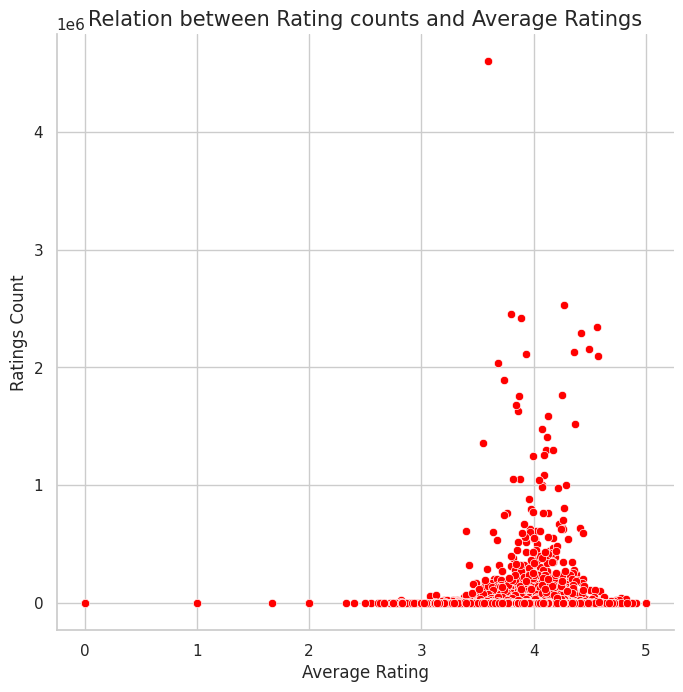

In [ ]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

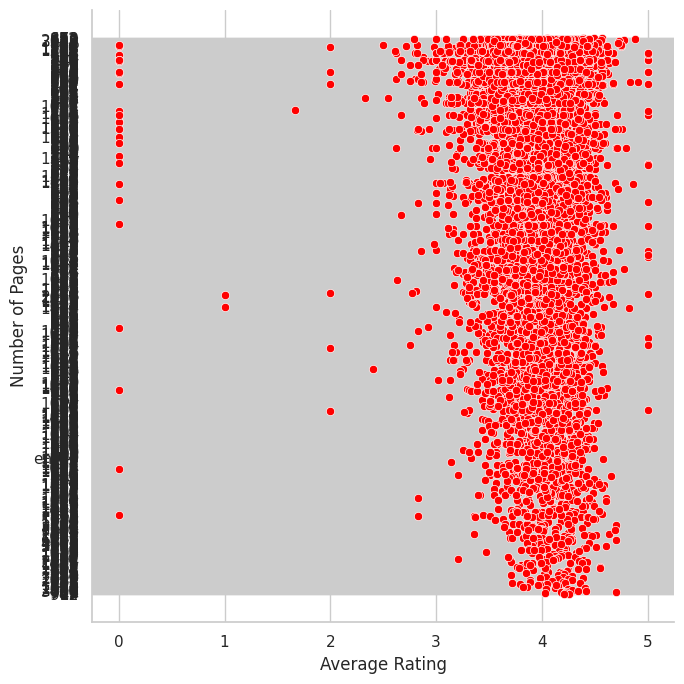

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [ ]:
df2 = df.copy()

In [ ]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [ ]:
features = pd.concat([rating_df,
                      language_df,
                      df2['average_rating'],
                      df2['ratings_count']], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer instance and specify the strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the features array to impute missing values
features_imputed = imputer.fit_transform(features)

# Now you can use features_imputed to fit your Nearest Neighbors model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features_imputed)
dist, idlist = model.kneighbors(features_imputed)


In [ ]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']